In [29]:
import astropy
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.stats as stats

# Morphology Data

---

In [30]:
morpho = astropy.io.fits.open('manga_visual_morpho-2.0.1.fits')
morpho_data = morpho[1].data
morpho[1].columns

ColDefs(
    name = 'Name'; format = '17A'
    name = 'plateifu'; format = '11A'
    name = 'MANGAID'; format = '9A'
    name = 'objra'; format = 'D'
    name = 'objdec'; format = 'D'
    name = 'Type'; format = '11A'
    name = 'TType'; format = 'I'; null = -32768
    name = 'Unsure'; format = 'I'; null = -32768
    name = 'Bars'; format = 'E'
    name = 'Edge_on'; format = 'I'; null = -32768
    name = 'Tidal'; format = 'I'; null = -32768
    name = 'C'; format = 'E'
    name = 'E_C'; format = 'E'
    name = 'A'; format = 'E'
    name = 'E_A'; format = 'E'
    name = 'S'; format = 'E'
    name = 'E_S'; format = 'E'
    name = 'cas_flag'; format = 'J'; null = -2147483648
)

In [31]:
# group galaxies according to their types

np.unique(morpho_data['Type'])

chararray(['BCD', 'E', 'E(dSph)', 'E+E', 'Edc', 'Irr', 'IrrAB', 'IrrB',
           'S', 'S-merger', 'S0', 'S0(dwarf)', 'S0a', 'SAB', 'SAB-merger',
           'SAB0', 'SAB0a', 'SABa', 'SABab', 'SABb', 'SABbc', 'SABc',
           'SABcd', 'SABd', 'SABdm', 'SABm', 'SB0', 'SB0a', 'SBa', 'SBab',
           'SBb', 'SBbc', 'SBc', 'SBcd', 'SBd', 'SBdm', 'SBm', 'Sa',
           'Sab', 'Sb', 'Sbc', 'Sc', 'Scd', 'Sd', 'Sdm', 'Sm', 'dIrr',
           'dSph', 'dwarf', 'interacting'], dtype='<U11')

In [32]:
# VERY IMPORTANT: GET RID OF REDUNDANT CHARACTERS!!!
types = np.char.strip(morpho_data['Type'])

early_types = ['E', 'E(dSph)', 'E+E', 'Edc', 'S0', 'S0a', 'S0(dwarf)', 'SAB0', 'SB0', 'SB0a', 'dSph']
late_types = ['Sa', 'Sb', 'Sbc', 'Sc', 'Sd', 'Sm', 'Sab', 'Sbc', 'Scd', 'SAB', 'SABa', 'SABb', 'SABbc', 'SABcd',
              'SBa', 'SBb', 'SBbc', 'SBcd', 'SBdm', 'SBm', 'S-merger', 'Irr', 'IrrAB', 'IrrB', 'dIrr', 'BCD', 'dwarf']

early_mask = np.isin(types, early_types)
early_galaxies = morpho_data[early_mask]

late_mask = np.isin(types, late_types)
late_galaxies = morpho_data[late_mask]

print(f"Number of early-type galaxies: {len(early_galaxies)}")
print(f"Number of late-type galaxies: {len(late_galaxies)}")
print(f'Number of all galaxies: {len(morpho_data)}')

Number of early-type galaxies: 3626
Number of late-type galaxies: 4975
Number of all galaxies: 10126


# AGN Data

---

In [33]:
agn = astropy.io.fits.open('manga_agn-v2_0_1.fits')
agn_data = agn[1].data
agn[1].columns

ColDefs(
    name = 'MANGAID'; format = '17A'
    name = 'RA'; format = 'E'
    name = 'DEC'; format = 'E'
    name = 'Z'; format = 'E'
    name = 'WISE_AGN'; format = 'I'
    name = 'LOG_LBOL_WISE'; format = 'E'
    name = 'LOG_LBOL_WISE_ERR'; format = 'E'
    name = 'BAT_AGN'; format = 'I'
    name = 'LOG_LBOL_BAT'; format = 'E'
    name = 'LOG_LBOL_BAT_ERR'; format = 'E'
    name = 'RADIO_AGN'; format = 'I'
    name = 'LOG_LBOL_RADIO'; format = 'E'
    name = 'LOG_LBOL_RADIO_ERR'; format = 'E'
    name = 'RADIO_CLASS'; format = '4A'
    name = 'BROAD_AGN'; format = 'I'
    name = 'LOG_LBOL_BROAD'; format = 'E'
    name = 'LOG_LBOL_BROAD_ERR'; format = 'E'
)

In [34]:
# group AGN data according to the hosting galaxy types

early_mask = np.isin(agn_data['MANGAID'], early_galaxies['Name'])
early_agn = agn_data[early_mask]

late_mask = np.isin(agn_data['MANGAID'], late_galaxies['Name'])
late_agn = agn_data[late_mask]

print(f"Number of early-type galaxies with AGNs: {len(early_agn)}")
print(f"Number of late-type galaxies with AGNs: {len(late_agn)}")

Number of early-type galaxies with AGNs: 236
Number of late-type galaxies with AGNs: 112


# Visualization

---

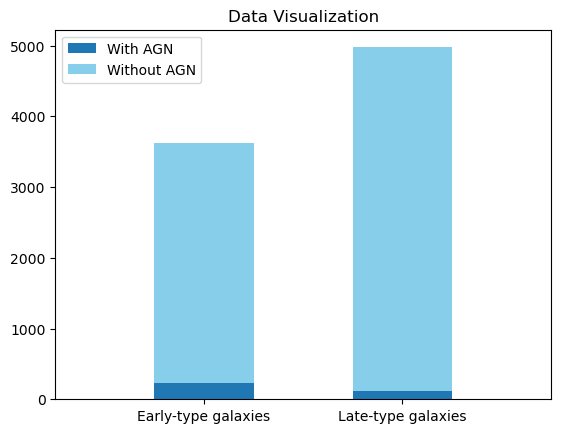

In [35]:
# plotting parameters
x = [0.3, 0.7]
bar_width = 0.2
prop_cycle = plt.rcParams['axes.prop_cycle'] # colors
colors = prop_cycle.by_key()['color']

plt.bar(x[0], len(early_agn), width=bar_width, color=colors[0], label='With AGN')
plt.bar(x[0], len(early_galaxies) - len(early_agn), width=bar_width, bottom=len(early_agn), color='skyblue', label='Without AGN')
plt.bar(x[1], len(late_agn), width=bar_width, color=colors[0])
plt.bar(x[1], len(late_galaxies) - len(late_agn), bottom=len(late_agn), width=bar_width, color='skyblue')
plt.legend()
plt.xticks(x, ['Early-type galaxies', 'Late-type galaxies'])
plt.xlim(0, 1)
plt.title('Data Visualization');

# Statistics

---

## Prior Distribution

We assume both type of galaxies share a same prior of Beta distribution.

In [36]:
a = 1
b = 1

## Prior Predictive Distribution

The prior predictive distribution is
$$
p(x)
=\int_0^1 p(x|\theta )\nu (\theta )\mathrm d\theta .
$$

In [37]:
# if we just want to predict for 1 galaxy

def integrand_prior(theta, x):
    return stats.bernoulli(theta).pmf(x)*stats.beta(a, b).pdf(theta)

def m(x):
    result, _ = integrate.quad(integrand_prior, 0, 1, args=(x, ))
    return result

m = np.vectorize(m)

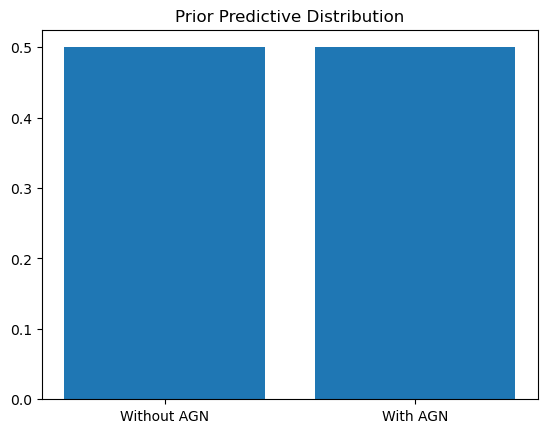

In [38]:
plt.bar([0, 1], m([0, 1]))
plt.xticks([0, 1], ['Without AGN', 'With AGN'])
plt.title('Prior Predictive Distribution');

In [39]:
# if we want to predict for n galaxies

def integrand_prior(theta, x):
    return stats.binom(len(early_galaxies), theta).pmf(x)*stats.beta(a, b).pdf(theta)

def m(x):
    result, _ = integrate.quad(integrand_prior, 0, 1, args=(x, ))
    return result

m = np.vectorize(m)

## Posterior Distribution

For a binomial model with Beta prior, the posterior will be a conjugate Beta distribution.

In [40]:
# compute posterior for early-type
x_early = len(early_agn)
n_early = len(early_galaxies)
post_early = stats.beta(a + x_early, n_early + b - x_early)

# compute posterior for late-type
x_late = len(late_agn)
n_late = len(late_galaxies)
post_late = stats.beta(a + x_late, n_late + b - x_late)

The expectation for theta_early is 0.06532524807056224
The expectation for theta_late is 0.022704440425959364


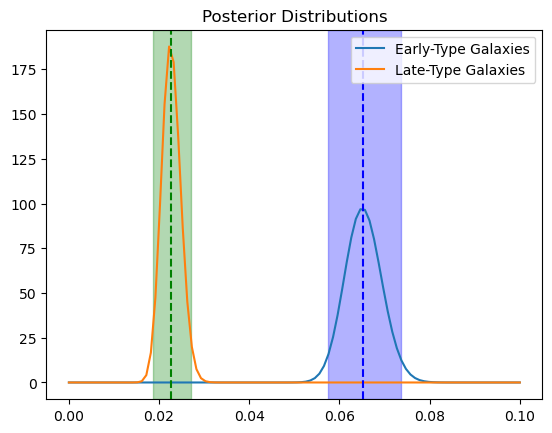

In [41]:
x_val = np.linspace(0, 0.1, 100)
y_early = post_early.pdf(x_val)
y_late = post_late.pdf(x_val)

print('The expectation for theta_early is', post_early.expect())
print('The expectation for theta_late is', post_late.expect())

plt.plot(x_val, y_early, label='Early-Type Galaxies')
plt.plot(x_val, y_late, label='Late-Type Galaxies')
plt.axvline(post_early.expect(), c='b', ls='--')
plt.axvline(post_late.expect(), c='g', ls='--')
plt.axvspan(post_early.ppf(0.025), post_early.ppf(0.975), color='b', alpha=0.3)
plt.axvspan(post_late.ppf(0.025), post_late.ppf(0.975), color='g', alpha=0.3)
plt.legend()
plt.title('Posterior Distributions')
plt.show()

## Posterior Predictive Distribution

For our model, the posterior predicted distribution is
$$
d(x|x_1 ,\dots ,x_n )
=\int_0^1 p(x|\theta )q(\theta |x_1 ,\dots ,x_n )\mathrm d\theta ,
$$
where $p$ is the (Bernoulli-distributed) likelihood and $q$ is the posterior.

In [42]:
# posterior predictive check

def integrand_early(theta, x):
    return stats.bernoulli(theta).pmf(x)*post_early.pdf(theta)

def integrand_late(theta, x):
    return stats.bernoulli(theta).pmf(x)*post_late.pdf(theta)

def d(x, integrand):
    result, _ = integrate.quad(integrand, 0, 0.1, args=(x, )) # it might be better to just integrate over the "important" regions
    return result

d = np.vectorize(d)

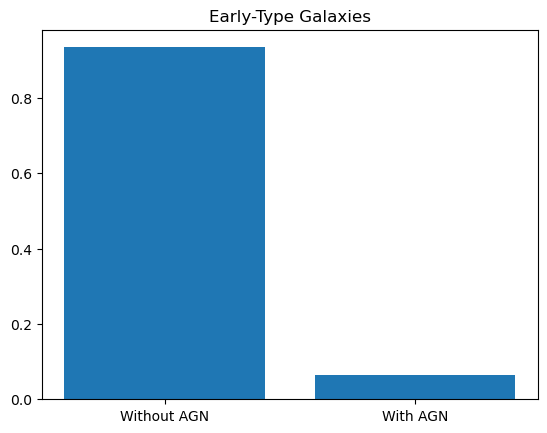

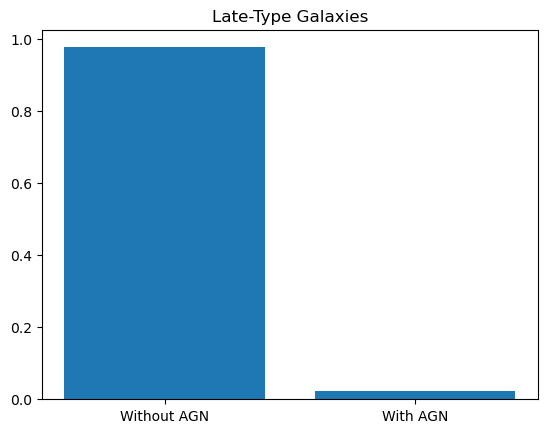

In [43]:
plt.bar([0, 1], d([0, 1], integrand_early))
plt.xticks([0, 1], ['Without AGN', 'With AGN'])
plt.title('Early-Type Galaxies');

plt.figure()
plt.bar([0, 1], d([0, 1], integrand_late))
plt.xticks([0, 1], ['Without AGN', 'With AGN'])
plt.title('Late-Type Galaxies');

## Sensitivity Analysis

Below we test several different inputs for the Beta prior that corresponding to different assumptions for the model parameter:
- $(2,2)$: close to $0.5$;
- $(0.5,0.5)$: close to $0$ or $1$;
- $(5,1)$: close to $1$;
- $(1,5)$: close to $0$.

As a reference, our prior of $(1,1)$ assumes that we have no prefered value for the model parameter.

The expectation for theta_early is 0.0655647382920108
The expectation for theta_late is 0.02289616388833101


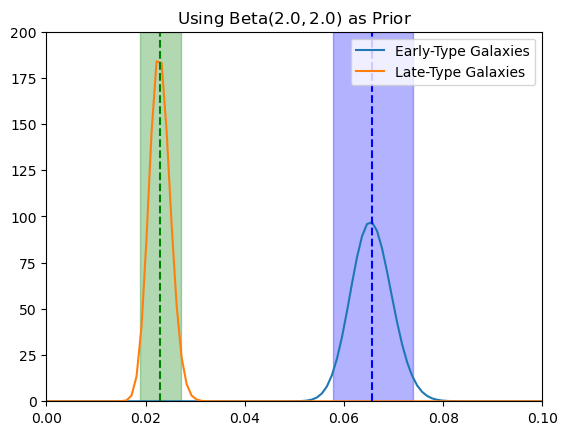

The expectation for theta_early is 0.06520540391508153
The expectation for theta_late is 0.02260852090032161


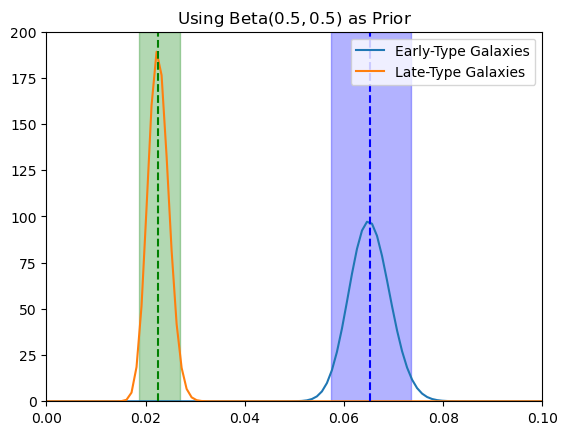

The expectation for theta_early is 0.0663546255506605
The expectation for theta_late is 0.023489259184902668


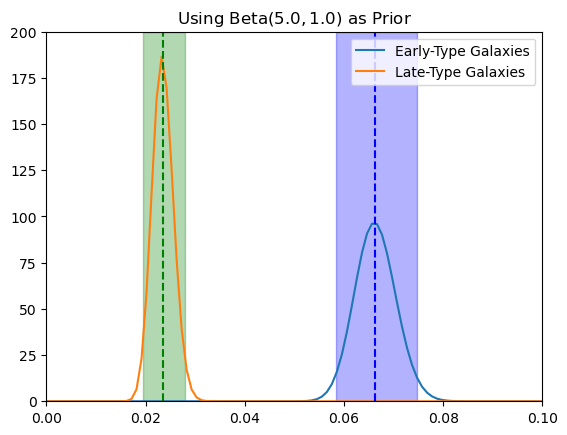

The expectation for theta_early is 0.06525330396475765
The expectation for theta_late is 0.022686207588837593


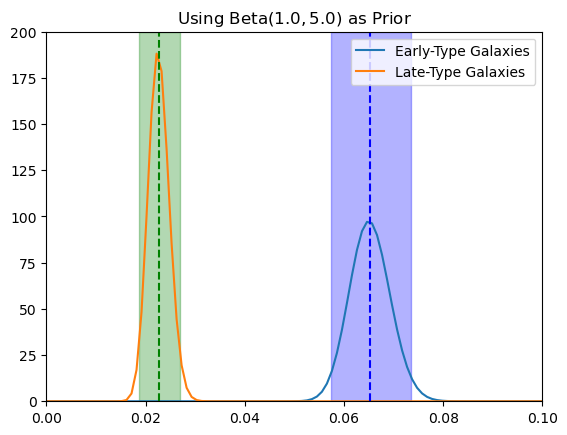

In [46]:
parameters = np.array([[2, 2], [0.5, 0.5], [5, 1], [1, 5]])

for a, b in parameters:
    post_early = stats.beta(a + x_early, n_early + b - x_early)
    post_late = stats.beta(a + x_late, n_late + b - x_late)

    x_val = np.linspace(0, 0.1, 100)
    y_early = post_early.pdf(x_val)
    y_late = post_late.pdf(x_val)

    print('The expectation for theta_early is', post_early.expect())
    print('The expectation for theta_late is', post_late.expect())

    plt.figure()
    plt.plot(x_val, y_early, label='Early-Type Galaxies')
    plt.plot(x_val, y_late, label='Late-Type Galaxies')
    plt.axvline(post_early.expect(), c='b', ls='--')
    plt.axvline(post_late.expect(), c='g', ls='--')
    plt.axvspan(post_early.ppf(0.025), post_early.ppf(0.975), color='b', alpha=0.3)
    plt.axvspan(post_late.ppf(0.025), post_late.ppf(0.975), color='g', alpha=0.3)
    plt.xlim(0, 0.1)
    plt.ylim(0, 200)
    plt.legend()
    plt.title(rf'Using $\mathrm {{Beta}} ({a} ,{b} )$ as Prior')
    plt.show()

The above plots imply that our result is not very sensitive to the choice of prior.

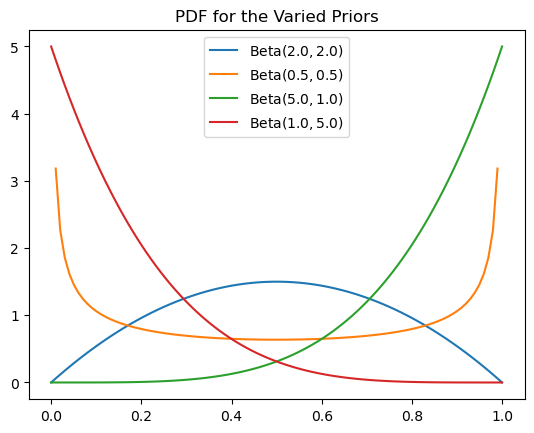

In [45]:
parameters = np.array([[2, 2], [0.5, 0.5], [5, 1], [1, 5]])

for a, b in parameters:
    prior = stats.beta(a, b)

    x_val = np.linspace(0, 1, 100)
    y_val = prior.pdf(x_val)

    plt.plot(x_val, y_val, label=rf'$\mathrm{{Beta}} ({a} ,{b} )$')

plt.legend()
plt.title('PDF for the Varied Priors')
plt.show()